## Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor

In [42]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [43]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [44]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [45]:
df.shape

(200000, 9)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Column 'pickup_datetime' datatype is object. It should be datetime.<br>
The columns dropoff_longitude and dropoff_latitude have one missing values.

## Pre-processing

In [47]:
df[df['dropoff_longitude'].isnull()]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [48]:
# Since there is only one missing value we can drop it

df.dropna(inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [49]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [50]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


1. Longitude and latitude values must be between -90 to 90. Some rows have inconsistent values.<br>
2. Minimum fare amount is negative. May be an error.<br>
3. Maximum fare is significantly high. It needs to be analyzed.<br>
4. The minimum passenger count is 0 and max is 208. Both the values seem inconsistent.<br>

In [51]:
df_delete = df[(df['pickup_latitude']>180) | (df['pickup_latitude']<-180)|
        (df['dropoff_latitude']>180) | (df['dropoff_latitude']< -180)|
       (df['pickup_longitude']>90) | (df['pickup_longitude']<-90) |
   (df['dropoff_longitude']>90) | (df['dropoff_longitude']<-90)]
df_delete.shape

(13, 9)

In [52]:
index_to_delete = df_delete.index
index_to_delete

Int64Index([  4949,  32549,  40908,  48506,  56617,  61793,  75851,  91422,
            103745, 139447, 144253, 161652, 199936],
           dtype='int64')

Values at above mentioned Index will be deleted.

In [53]:
df.drop(index_to_delete,inplace=True)

In [54]:
# Rechecking the dimenion of our data

df.shape

(199986, 9)

In [55]:
df[df['fare_amount']<= 0].shape

(22, 9)

## EDA

(0.0, 5000.0)

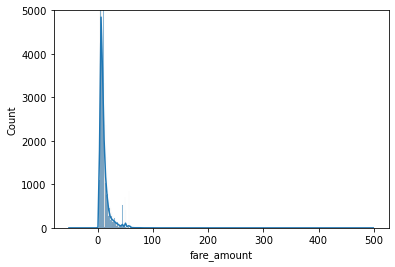

In [56]:
# Plot to check the fare distribution of rides

sns.histplot(df['fare_amount'],kde=True)
plt.ylim(0,5000)

From the graph above we can say that there are more than 4800 Entries which have fare amount between 0-50<br>
17 records have negative or zero fare amount. So, we can drop these records

In [57]:
df_fare_delete = df[df['fare_amount']<=0]
index_to_delete_fare = df_fare_delete.index
df.drop(index_to_delete_fare,inplace=True)

In [58]:
df.shape

(199964, 9)

In [59]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999640e+05,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000
mean,2.771260e+07,11.362560,-72.501889,39.918031,-72.512649,39.922574,1.684493
std,1.601405e+07,9.897193,10.449179,6.130103,10.408913,6.116051,1.385979
min,1.000000e+00,0.010000,-89.933333,-74.015515,-75.458979,-74.015750,0.000000
25%,1.382528e+07,6.000000,-73.992064,40.734792,-73.991407,40.733825,1.000000
50%,2.774550e+07,8.500000,-73.981822,40.752590,-73.980092,40.753042,1.000000
75%,4.155571e+07,12.500000,-73.967155,40.767157,-73.963659,40.768000,2.000000
max,5.542357e+07,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000


Maximum fare can be analyzed later when distance covered during ride will be calculated

In [60]:
df['passenger_count'].value_counts()

1      138404
2       29423
5       14004
3        8878
4        4275
6        4271
0         708
208         1
Name: passenger_count, dtype: int64

Only 1 ride contains passenger count as 208, may be wrong data. It can be dropped.<br>
Around 700 rides show no passenger. It can be replaced with 1.

In [61]:
index_to_delete_passenger = df[df['passenger_count']==df['passenger_count'].max()].index
df.drop(index_to_delete_passenger,inplace=True)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

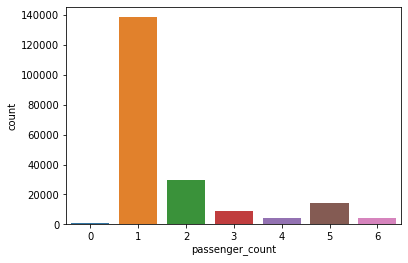

In [62]:
sns.countplot(data = df,x = 'passenger_count')

In [63]:
df.shape

(199963, 9)

In [65]:
df['passenger_count'] = np.where(df['passenger_count']==0,1,df['passenger_count'])

In [66]:
df['passenger_count'].value_counts()

1    139112
2     29423
5     14004
3      8878
4      4275
6      4271
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

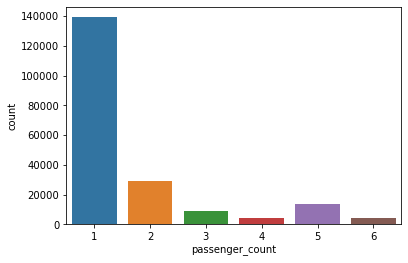

In [68]:
sns.countplot(data = df,x = 'passenger_count')

Here we calculate geodesic distance as it is the shortest distance on the surface of an ellipsoidal model of the earth.

In [70]:
df['pickup_location'] = tuple(zip(df['pickup_longitude'],df['pickup_latitude']))
df['dropoff_location'] = tuple(zip(df['dropoff_longitude'],df['dropoff_latitude']))

In [74]:
from geopy import distance
df['distance_travelled'] = df.apply(lambda row: distance.distance(row['pickup_location'], row['dropoff_location']).km,axis=1)

If we donot use .km then distance values come with km written that takes it as object

In [75]:
df['distance_travelled'] = df.distance_travelled.round(2)

In [76]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_location,dropoff_location,distance_travelled
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,"(-73.99981689453125, 40.73835372924805)","(-73.99951171875, 40.72321701049805)",0.47
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,"(-73.994355, 40.728225)","(-73.99471, 40.750325)",0.68
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,"(-74.005043, 40.74077)","(-73.962565, 40.772647)",4.84
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,"(-73.976124, 40.790844)","(-73.965316, 40.803349)",1.27
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,"(-73.925023, 40.744085)","(-73.97308199999999, 40.761247)",5.39


In [77]:
df[df['distance_travelled']==0].shape

(6035, 12)

In [79]:
index_to_delete_distance = df[df['distance_travelled']==0].index
df.drop(index_to_delete_distance,inplace=True)

In [80]:
df.shape

(193928, 12)

In [82]:
df_delete_lat_long = df[(df['pickup_longitude']==0) | (df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) ]
df_delete_lat_long

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_location,dropoff_location,distance_travelled
346,25741482,2015-03-05 19:15:07.0000001,15.50,2015-03-05 19:15:07+00:00,0.000000,0.000000,-73.979805,40.786030,1,"(0.0, 0.0)","(-73.97980499267578, 40.78602981567383)",8655.72
1067,10614181,2014-02-02 22:27:00.000000234,52.00,2014-02-02 22:27:00+00:00,-73.781095,40.645015,0.000000,0.000000,1,"(-73.781095, 40.645015)","(0.0, 0.0)",8636.30
1526,16419344,2014-05-12 12:00:15.0000002,2.50,2014-05-12 12:00:15+00:00,-74.001849,40.715156,0.000000,0.000000,3,"(-74.00184899999999, 40.715156)","(0.0, 0.0)",8656.09
2547,1227592,2011-09-20 21:08:00.00000037,10.10,2011-09-20 21:08:00+00:00,0.000000,0.000000,-73.953210,40.803528,2,"(0.0, 0.0)","(-73.95321, 40.803528)",8653.88
3045,2267128,2013-03-26 02:25:17.0000001,15.00,2013-03-26 02:25:17+00:00,0.000000,0.000000,-73.843777,40.739255,1,"(0.0, 0.0)","(-73.843777, 40.739255)",8643.46
...,...,...,...,...,...,...,...,...,...,...,...,...
196967,35583841,2014-09-17 09:40:30.0000003,57.33,2014-09-17 09:40:30+00:00,0.000000,0.000000,-73.789045,40.655135,2,"(0.0, 0.0)","(-73.789045, 40.655135)",8637.17
197468,45145191,2011-02-23 19:42:00.000000141,6.90,2011-02-23 19:42:00+00:00,0.000000,0.000000,-73.980827,40.747133,5,"(0.0, 0.0)","(-73.980827, 40.747133000000005)",8655.01
197863,54381864,2014-11-18 22:10:03.0000001,7.00,2014-11-18 22:10:03+00:00,-73.962190,40.759158,0.000000,0.000000,1,"(-73.96219, 40.759158)","(0.0, 0.0)",8653.71
198567,29279997,2013-10-21 01:28:00.00000010,23.50,2013-10-21 01:28:00+00:00,-73.968115,40.801455,0.000000,0.000000,2,"(-73.968115, 40.801455)","(0.0, 0.0)",8655.07


As the above rows show some inconsistent data (as the latitude and longitude values for pickup and dropoff locations are all zeros which is the location in South Atlantic Ocean), we have dropped these rows.

In [83]:
index_to_delete_lat_long = df[(df['pickup_longitude']==0) | (df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) ].index

df.drop(index_to_delete_lat_long,inplace=True)

In [84]:
df.shape

(193549, 12)

## Outliers Detection and Removal

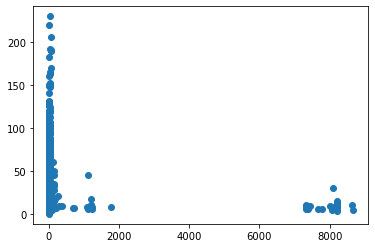

In [85]:
plt.scatter(data = df,x='distance_travelled',y='fare_amount')

In [86]:
for feature in ['fare_amount','distance_travelled']:

    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    upper_whisker = q3+1.5*iqr
    lower_whisker = q1-1.5*iqr
    print(str.upper(feature))
    print('Upper Whisker',upper_whisker)
    print('Lower Whisker',lower_whisker)
    print('************************************')

FARE_AMOUNT
Upper Whisker 22.25
Lower Whisker -3.75
************************************
DISTANCE_TRAVELLED
Upper Whisker 5.855
Lower Whisker -2.1050000000000004
************************************


<AxesSubplot:>

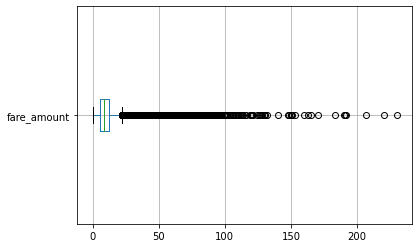

In [87]:
df[['fare_amount']].boxplot(vert=0)

In [88]:
for feature in ['fare_amount','distance_travelled']:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    upper_whisker = q3+1.5*iqr
    lower_whisker = q1-1.5*iqr
    df[feature]=np.where(df[feature]<lower_whisker,lower_whisker,df[feature])
    df[feature]=np.where(df[feature]>upper_whisker,upper_whisker,df[feature])

<AxesSubplot:>

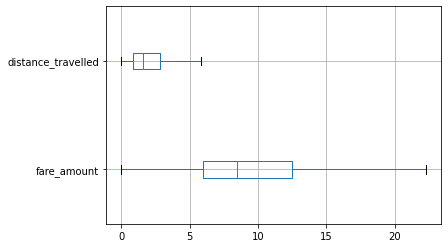

In [89]:
df[['fare_amount','distance_travelled']].boxplot(vert=0)

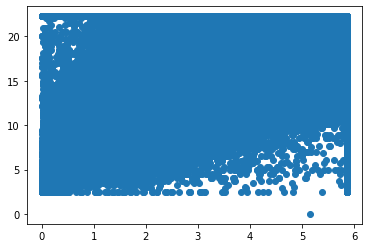

In [90]:
plt.scatter(data = df,x='distance_travelled',y='fare_amount')

In [91]:
df['year'] = pd.DatetimeIndex(df['pickup_datetime']).year
df['month'] = pd.DatetimeIndex(df['pickup_datetime']).month_name()
df['day'] = pd.DatetimeIndex(df['pickup_datetime']).day
df['week_day'] = pd.DatetimeIndex(df['pickup_datetime']).day_name()
df['pickup_time'] = pd.DatetimeIndex(df['pickup_datetime']).time
#df_uber['hour'] = pd.DatetimeIndex(df_uber['pickup_datetime']).hour
df['period'] = (pd.DatetimeIndex(df['pickup_datetime']).hour % 24 + 4) // 4
df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
df['Quarter'] = pd.DatetimeIndex(df['pickup_datetime']).quarter

In [92]:
df.sample(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_location,dropoff_location,distance_travelled,year,month,day,week_day,pickup_time,period,Quarter
15855,19164561,2010-05-01 16:58:00.0000008,16.5,2010-05-01 16:58:00+00:00,-73.972627,40.780838,-74.002450,40.728992,1,"(-73.972627, 40.780838)","(-74.00245, 40.728992)",3.69,2010,May,1,Saturday,16:58:00,Evening,2
62924,39126224,2012-02-10 11:04:03.0000002,12.1,2012-02-10 11:04:03+00:00,-73.990570,40.686482,-73.990330,40.730707,1,"(-73.99056999999999, 40.686482)","(-73.99033, 40.730707)",1.36,2012,February,10,Friday,11:04:03,Morning,1
76916,2684105,2015-03-06 13:24:17.0000001,13.5,2015-03-06 13:24:17+00:00,-73.956642,40.775391,-73.971405,40.760975,5,"(-73.9566421508789, 40.775390625)","(-73.97140502929686, 40.7609748840332)",1.71,2015,March,6,Friday,13:24:17,Noon,1
191619,50141175,2013-06-22 18:50:02.0000004,10.0,2013-06-22 18:50:02+00:00,-73.959377,40.774275,-73.988148,40.764538,2,"(-73.959377, 40.774275)","(-73.988148, 40.764538)",3.23,2013,June,22,Saturday,18:50:02,Evening,2
127302,17926215,2009-08-01 12:21:31.0000005,4.9,2009-08-01 12:21:31+00:00,-73.976042,40.788733,-73.979743,40.782738,1,"(-73.976042, 40.788733)","(-73.979743, 40.782738)",0.45,2009,August,1,Saturday,12:21:31,Noon,3


In [93]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_location,dropoff_location,distance_travelled,year,month,day,week_day,pickup_time,period,Quarter
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,"(-73.99981689453125, 40.73835372924805)","(-73.99951171875, 40.72321701049805)",0.47,2015,May,7,Thursday,19:52:06,Evening,2
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,"(-73.994355, 40.728225)","(-73.99471, 40.750325)",0.68,2009,July,17,Friday,20:04:56,Night,3
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,"(-74.005043, 40.74077)","(-73.962565, 40.772647)",4.84,2009,August,24,Monday,21:45:00,Night,3
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,"(-73.976124, 40.790844)","(-73.965316, 40.803349)",1.27,2009,June,26,Friday,08:22:21,Morning,2
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,"(-73.925023, 40.744085)","(-73.97308199999999, 40.761247)",5.39,2014,August,28,Thursday,17:47:00,Evening,3


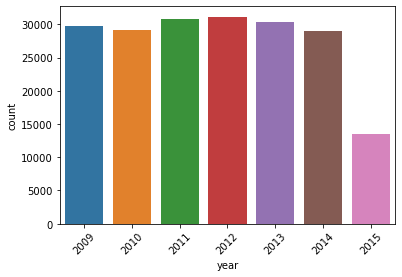

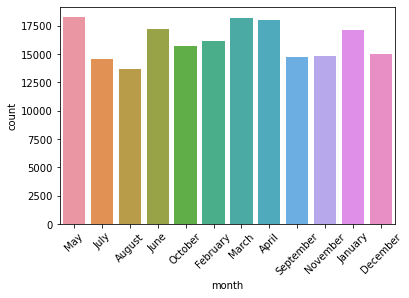

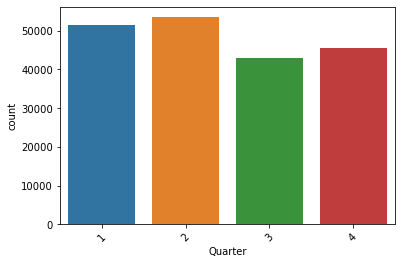

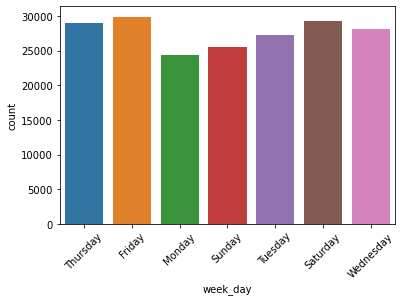

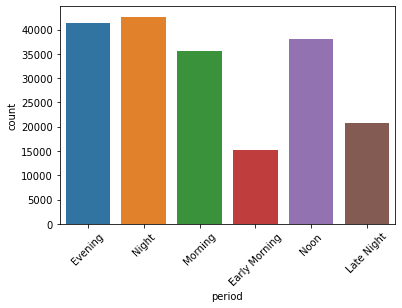

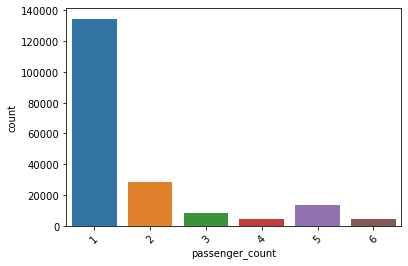

In [94]:
for col in ['year','month','Quarter','week_day','period','passenger_count']:
    sns.countplot(data = df, x = col)
    plt.xticks(rotation=45)
    plt.show()

In [95]:
df_uber_rel = df[['fare_amount','passenger_count','distance_travelled','year','month','week_day','period','Quarter']]
df_uber_rel.head()

,fare_amount,passenger_count,distance_travelled,year,month,week_day,period,Quarter
0,7.5,1,0.47,2015,May,Thursday,Evening,2
1,7.7,1,0.68,2009,July,Friday,Night,3
2,12.9,1,4.84,2009,August,Monday,Night,3
3,5.3,3,1.27,2009,June,Friday,Morning,2
4,16.0,5,5.39,2014,August,Thursday,Evening,3


In [96]:
df_uber_rel.describe()

,fare_amount,passenger_count,distance_travelled,year,Quarter
count,193549.000000,193549.000000,193549.000000,193549.000000,193549.000000
mean,10.093146,1.687950,2.119058,2011.745775,2.427277
std,5.418932,1.304281,1.643296,1.859618,1.116815
min,0.010000,1.000000,0.010000,2009.000000,1.000000
25%,6.000000,1.000000,0.880000,2010.000000,1.000000
50%,8.500000,1.000000,1.580000,2012.000000,2.000000
75%,12.500000,2.000000,2.870000,2013.000000,3.000000
max,22.250000,6.000000,5.855000,2015.000000,4.000000


In [98]:
import warnings
warnings.filterwarnings('ignore')

df_uber_rel['period'].replace({'Early Morning' : 1,
                           'Morning' : 2,
                           'Noon' : 3,
                           'Evening' : 4,
                           'Night' : 5,
                           'Late Night' : 6},inplace=True)

In [99]:
df['month'].value_counts()

May          18271
March        18175
April        18013
June         17217
January      17130
February     16152
October      15692
December     15043
November     14830
September    14774
July         14589
August       13663
Name: month, dtype: int64

In [100]:
df_uber_rel['month'].replace({'January':1, 'February':2, 'March':3, 'April':4,'May':5,'June':6,'July':7,'August':8,
                         'September' :9, 'October':10, 'November':11, 'December':12},inplace=True)

In [102]:
df_uber_rel['week_day'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,
                                 'Friday':5,'Saturday':6,'Sunday':7},inplace=True)

In [103]:
df_uber_rel['year'].unique()

array([2015, 2009, 2014, 2012, 2011, 2010, 2013])

In [104]:
df_uber_rel['year'].replace({2009:1,2010:2,2011:3,2012:4,2013:5,2014:6,2015:7},inplace=True)

In [105]:
df_uber_rel.head()

,fare_amount,passenger_count,distance_travelled,year,month,week_day,period,Quarter
0,7.5,1,0.47,7,5,4,4,2
1,7.7,1,0.68,1,7,5,5,3
2,12.9,1,4.84,1,8,1,5,3
3,5.3,3,1.27,1,6,5,2,2
4,16.0,5,5.39,6,8,4,4,3


<AxesSubplot:>

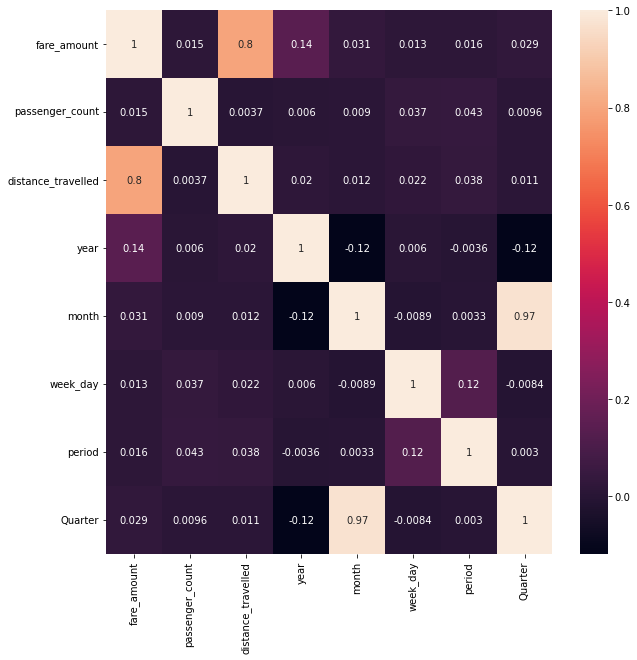

In [106]:
corr = df_uber_rel.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

The heatmap shows that the target column i.e. fare_amount and distance travelled have a very strong correlation.

## Scaling Data

In [107]:
scaler = MinMaxScaler()
df_uber_scaled = scaler.fit_transform(df_uber_rel)
df_uber_scaled = pd.DataFrame(df_uber_scaled,columns=df_uber_rel.columns)
df_uber_scaled

,fare_amount,passenger_count,distance_travelled,year,month,week_day,period,Quarter
0,0.336781,0.0,0.078700,1.000000,0.363636,0.500000,0.6,0.333333
1,0.345773,0.0,0.114628,0.000000,0.545455,0.666667,0.8,0.666667
2,0.579586,0.0,0.826347,0.000000,0.636364,0.000000,0.8,0.666667
3,0.237860,0.4,0.215569,0.000000,0.454545,0.666667,0.2,0.333333
4,0.718975,0.8,0.920445,0.833333,0.636364,0.500000,0.6,0.666667
...,...,...,...,...,...,...,...,...
193544,0.134442,0.0,0.008554,0.500000,0.818182,1.000000,0.2,1.000000
193545,0.336781,0.0,0.417451,0.833333,0.181818,0.666667,1.0,0.000000
193546,1.000000,0.2,1.000000,0.000000,0.454545,0.000000,1.0,0.333333
193547,0.651529,0.0,0.307956,1.000000,0.363636,0.333333,0.4,0.333333


In [110]:
from statsmodels.formula.api import ols

f_passenger_count = 'passenger_count~distance_travelled+year+month+week_day+period+Quarter'
m_passenger_count = ols(formula=f_passenger_count,data=df_uber_rel).fit()
rsq_passenger_count = m_passenger_count.rsquared
vif_passenger_count = round(1/(1-rsq_passenger_count),2)

f_distance_travelled = 'distance_travelled~passenger_count+year+month+week_day+period+Quarter'
m_distance_travelled = ols(formula=f_distance_travelled,data=df_uber_rel).fit()
rsq_distance_travelled = m_distance_travelled.rsquared
vif_distance_travelled = round(1/(1-rsq_distance_travelled),2)

f_year = 'year~passenger_count+distance_travelled+month+week_day+period+Quarter'
m_year = ols(formula=f_year,data=df_uber_rel).fit()
rsq_year = m_year.rsquared
vif_year = round(1/(1-rsq_year),2)

f_month = 'month~passenger_count+distance_travelled+year+week_day+period+Quarter'
m_month = ols(formula=f_month,data=df_uber_rel).fit()
rsq_month = m_month.rsquared
vif_month = round(1/(1-rsq_month),2)

f_week_day = 'week_day~passenger_count+distance_travelled+year+month+period+Quarter'
m_week_day = ols(formula=f_week_day,data=df_uber_rel).fit()
rsq_week_day = m_week_day.rsquared
vif_week_day = round(1/(1-rsq_week_day),2)

f_period = 'period~passenger_count+distance_travelled+year+month+week_day+Quarter'
m_period = ols(formula=f_period,data=df_uber_rel).fit()
rsq_period = m_period.rsquared
vif_period = round(1/(1-rsq_period),2)

f_Quarter = 'Quarter~passenger_count+distance_travelled+year+month+week_day+period'
m_Quarter = ols(formula=f_Quarter,data=df_uber_rel).fit()
rsq_Quarter = m_Quarter.rsquared
vif_Quarter = round(1/(1-rsq_Quarter),2)

In [111]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_location',
       'dropoff_location', 'distance_travelled', 'year', 'month', 'day',
       'week_day', 'pickup_time', 'period', 'Quarter'],
      dtype='object')

In [112]:
vif_dic = {'feature':['passenger_count', 'distance_travelled', 'year', 'month',
       'week_day', 'period', 'Quarter'], 'VIF':[vif_passenger_count,vif_distance_travelled,vif_year,vif_month,vif_week_day,vif_period,vif_Quarter]}
pd.DataFrame(data=vif_dic)

,feature,VIF
0,passenger_count,1.00
1,distance_travelled,1.00
2,year,1.01
3,month,17.54
4,week_day,1.02
5,period,1.02
6,Quarter,17.55


In [113]:
f_passenger_count = 'passenger_count~distance_travelled+year+month+week_day+period'
m_passenger_count = ols(formula=f_passenger_count,data=df_uber_rel).fit()
rsq_passenger_count = m_passenger_count.rsquared
vif_passenger_count = round(1/(1-rsq_passenger_count),2)

f_distance_travelled = 'distance_travelled~passenger_count+year+month+week_day+period'
m_distance_travelled = ols(formula=f_distance_travelled,data=df_uber_rel).fit()
rsq_distance_travelled = m_distance_travelled.rsquared
vif_distance_travelled = round(1/(1-rsq_distance_travelled),2)

f_year = 'year~passenger_count+distance_travelled+month+week_day+period'
m_year = ols(formula=f_year,data=df_uber_rel).fit()
rsq_year = m_year.rsquared
vif_year = round(1/(1-rsq_year),2)

f_month = 'month~passenger_count+distance_travelled+year+week_day+period'
m_month = ols(formula=f_month,data=df_uber_rel).fit()
rsq_month = m_month.rsquared
vif_month = round(1/(1-rsq_month),2)

f_week_day = 'week_day~passenger_count+distance_travelled+year+month+period'
m_week_day = ols(formula=f_week_day,data=df_uber_rel).fit()
rsq_week_day = m_week_day.rsquared
vif_week_day = round(1/(1-rsq_week_day),2)

f_period = 'period~passenger_count+distance_travelled+year+month+week_day'
m_period = ols(formula=f_period,data=df_uber_rel).fit()
rsq_period = m_period.rsquared
vif_period = round(1/(1-rsq_period),2)

vif_dic = {'feature':['passenger_count', 'distance_travelled', 'year', 'month',
       'week_day', 'period'], 'VIF':[vif_passenger_count,vif_distance_travelled,vif_year,vif_month,vif_week_day,vif_period]}
pd.DataFrame(data=vif_dic)

,feature,VIF
0,passenger_count,1.00
1,distance_travelled,1.00
2,year,1.01
3,month,1.01
4,week_day,1.02
5,period,1.02


No Multicollinearity

## Multiple Linear Regression

In [114]:
formula1 = 'fare_amount ~ passenger_count+distance_travelled+year+month+week_day+period'
model1 = ols(formula=formula1,data=df_uber_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 6.091e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:30:07   Log-Likelihood:             1.0130e+05
No. Observations:              193549   AIC:                        -2.026e+05
Df Residuals:                  193542   BIC:                        -2.025e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1499      0.001    129.365      0.000       0.148       0.152
passenger_count        0.0112      0.001      8.924      0.000       0.009       0.014
distance_travelled     0.6890      0.001    593.733      0.000       0.687       0.691
year                   0.1029      0.001     97.144      0.000       0.101       0.105
month                  0.0288      0.001     27.433      0.000       0.027       0.031
week_day              -0.0024      0.001     -2.331      0.020      -0.004      -0.000
period                -0.0121      0.001    -10.775      0.000      -0.014      -0.010
==============================================================================
Omnibus:                    37717.873   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106958.068
Skew:                           1.035   Prob(JB):                         0.00
Kurtosis:                       5.996   Cond. No.                         7.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Train-Test Split

In [115]:
X = df_uber_scaled.drop(['Quarter'],axis=1)
y = df_uber_scaled['fare_amount']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1) 

In [117]:
X_train.shape

(135484, 7)

In [118]:
X_test.shape

(58065, 7)

### Checking Performance of Final Model

In [119]:
LR_model_train_pred = model1.predict(X_train)
LR_model_test_pred = model1.predict(X_test)
LR_model_train_RMSE =  np.round(np.sqrt(mean_squared_error(y_train,LR_model_train_pred)),4)
LR_model_test_RMSE = np.round(np.sqrt(mean_squared_error(y_test,LR_model_test_pred)),4)
LR_model_train_MAPE = (sum(np.abs(y_train-LR_model_train_pred)/y_train)/X_train.shape[0])*100
LR_model_test_MAPE = (sum(np.abs(y_test-LR_model_test_pred)/y_test)/X_test.shape[0])*100

In [120]:
LR_residual = model1.resid

In [121]:
LR_predict = model1.predict(X)

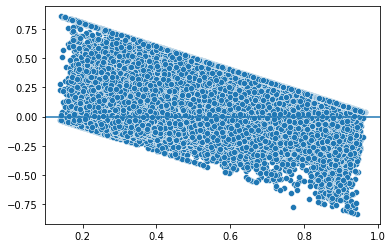

In [122]:
sns.scatterplot(x=LR_predict, y=LR_residual)
plt.axhline(y=0)

<AxesSubplot:ylabel='Density'>

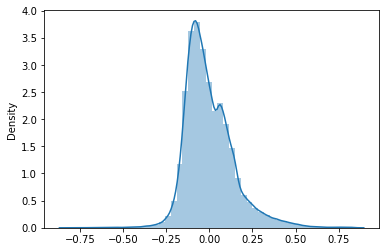

In [123]:
sns.distplot(LR_residual)

<AxesSubplot:>

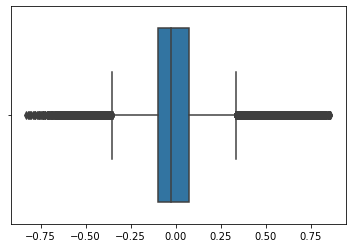

In [124]:
sns.boxplot(LR_residual)

## Random Forest Regressor

In [125]:
RF_Base = RandomForestRegressor(random_state=1)

In [126]:
RF_Base.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [127]:
RF_Base_train_predict = RF_Base.predict(X_train)
RF_Base_test_predict = RF_Base.predict(X_test)

In [128]:
RF_Base_R_square_train = RF_Base.score(X_train,y_train)
RF_Base_R_square_train

0.9999999954098738

In [129]:
RF_Base_R_square_test = RF_Base.score(X_test,y_test)
RF_Base_R_square_test

0.9999963297362983

In [131]:
RF_Base_Adj_R_square_train = 1 - ((1 - RF_Base_R_square_train) * (len(X_train) - 1) / (len(X_train) - 
                                                                                       X_train.shape[1]  - 1))
RF_Base_Adj_R_square_train

0.9999999954096367

In [132]:
RF_Base_Adj_R_square_test = 1 - ((1 - RF_Base_R_square_test) * (len(X_test) - 1) / (len(X_test) - X_test.shape[1]  - 1))
RF_Base_Adj_R_square_test

0.9999963292937702

In [133]:
RF_Base_model_train_RMSE =  np.round(np.sqrt(mean_squared_error(y_train,RF_Base_train_predict)),4)
RF_Base_model_test_RMSE = np.round(np.sqrt(mean_squared_error(y_test,RF_Base_test_predict)),4)
RF_Base_model_train_MAPE = (sum(np.abs(y_train-RF_Base_train_predict)/y_train)/X_train.shape[0])*100
RF_Base_model_test_MAPE = (sum(np.abs(y_test-RF_Base_test_predict)/y_test)/X_test.shape[0])*100

In [134]:
print("Train RMSE",RF_Base_model_train_RMSE)
print("Test RMSE",RF_Base_model_test_RMSE)
print("Train MAPE",RF_Base_model_train_MAPE)
print("Test MAPE",RF_Base_model_test_MAPE)

Train RMSE 0.0
Test RMSE 0.0005
Train MAPE 7.297371880461737e-05
Test MAPE inf


In [135]:
RF_Base_train_predict

array([0.40422662, 0.79541367, 0.16591727, ..., 0.25584532, 1.        ,
       0.18390288])

In [136]:
pd.DataFrame(RF_Base.feature_importances_,index=df_uber_scaled.columns.drop('fare_amount')
             ,columns=['Feature Importance']).sort_values(ascending=False,by = ['Feature Importance'])

,Feature Importance
passenger_count,9.999997e-01
month,2.526846e-07
Quarter,3.342099e-08
week_day,3.003126e-09
year,2.863717e-09
period,1.966821e-09
distance_travelled,8.106005e-10
